<div>
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller"><img src="data_layout/PCP_Teaser.png" width=100% style="float: right;" alt="PCP Teaser"></a>
</div>

# Unit 10: Python Modules and Packages

<ul>
    <li><a href='#learn'>Overview and Learning Objectives</a></li>    
    <li><a href='#python_modules'>Python Modules</a></li>
    <li><a href='#python_packages'>Python Packages</a></li>
    <li><a href='#lib_PCP'>The Package <code>libpcp</code> </a></li>
    <li><a href='#doc_functions'>Documentation of Functions</a></li>    
</ul>    

<a id='learn'></a> 
<div class="alert alert-block alert-warning">
<h2>Overview and Learning Objectives</h2>

This final unit of the PCP notebooks serves several purposes. First, we give a general introduction to  <a href='#python_modules'>Python modules</a> and <a href='#python_packages'>Python packages</a>, which are fundamental concepts for organizing and making Python code available. Second, we introduce the Python package <code>libpcp</code> (that accompanies the PCP notebooks) and use this package as a concrete example for illustrating the Python concepts. At the same time, this unit (together with <a href='PCP_01_getstarted.html'>Unit 1</a>) also documents the technical backbone underlying the PCP notebooks. Last but not least, we will also uncover in this unit the secret of where one can find the sample solutions for all exercises. In summary, we hope that the PCP notebooks help students naturally transition from learning about Python programming and signal processing to beginning independent research following good scientific practices. Another main motivation of the notebooks is to indirectly guide students to employ open-source tools for software development and reproducible research. 

</div>

<a id='python_modules'></a> 
## Python Modules

A Python module is basically a file with an extension `.py` containing Python code. The content of a module can be accessed with the `import` statement. As an example, we consider the file `module.py` contained in the folder `libpcp`. When the `import` statement is executed, the interpreter searches for `module.py` in a list of directories which specifies the search paths for modules. The variable `sys.path` (which is part of the module `sys`) yields the list of directories. It is initialized from the environment variable `PYTHONPATH` (plus an installation-dependent default). The list contained in `sys.path` can be extended using the function `sys.path.append`. The following example illustrates these concepts:

In [1]:
import sys
print(sys.path, '\n')

import os
sys.path.append('libpcp')
print(sys.path, '\n')

['/Users/rosenzweig/Documents/development/PCP', '/Users/rosenzweig/miniconda3/envs/PCP/lib/python37.zip', '/Users/rosenzweig/miniconda3/envs/PCP/lib/python3.7', '/Users/rosenzweig/miniconda3/envs/PCP/lib/python3.7/lib-dynload', '', '/Users/rosenzweig/miniconda3/envs/PCP/lib/python3.7/site-packages', '/Users/rosenzweig/miniconda3/envs/PCP/lib/python3.7/site-packages/IPython/extensions', '/Users/rosenzweig/.ipython'] 

['/Users/rosenzweig/Documents/development/PCP', '/Users/rosenzweig/miniconda3/envs/PCP/lib/python37.zip', '/Users/rosenzweig/miniconda3/envs/PCP/lib/python3.7', '/Users/rosenzweig/miniconda3/envs/PCP/lib/python3.7/lib-dynload', '', '/Users/rosenzweig/miniconda3/envs/PCP/lib/python3.7/site-packages', '/Users/rosenzweig/miniconda3/envs/PCP/lib/python3.7/site-packages/IPython/extensions', '/Users/rosenzweig/.ipython', 'libpcp'] 



Once the directory of the module is in the search path, we can use the `import` statement. Let us come back to our example `module.py`, which has the following content:

In [2]:
import os

fn = os.path.join('libpcp', 'module.py')
with open(fn, 'r', encoding='utf-8') as stream:
    content_text = stream.read()
    
print(content_text)

"""
Module: libpcp.module
Author: Meinard Mueller, International Audio Laboratories Erlangen
License: The MIT license, https://opensource.org/licenses/MIT
This file is part of the PCP Notebooks (https://www.audiolabs-erlangen.de/PCP)
"""

string = 'This is a test string'
string_init = 'This is a test string specified in the __init__.py file'
a, b, c = 1, 2, 3


def add(a, b=0, c=0):
    """Function to add three numbers

    Notebook: PCP_10_module.ipynb

    Args:
        a: first number
        b: second number (Default value = 0)
        c: third number (Default value = 0)

    Returns:
        Sum of a, b and c
    """
    d = a + b + c
    print('Addition: ', a, ' + ', b, ' + ', c, ' = ', d)
    return d


def test_function_init(string_input = string_init):
    """Test function specified in the __init__.py file

    Notebook: PCP_10_module.ipynb

    Args:
        string_input: Input string (Default value = string_init)
    """
    print('=== Test:', string_input, '===')



The following options import the module `module` or some of its elements:

In [3]:
import libpcp.module
result = libpcp.module.add(libpcp.module.a, libpcp.module.b, libpcp.module.c)

from libpcp.module import add
result = add(4, 5)

from libpcp.module import add as s
result = s(6)

from libpcp.module import *
result = add(a, b, c)

Addition:  1  +  2  +  3  =  6
Addition:  4  +  5  +  0  =  9
Addition:  6  +  0  +  0  =  6
Addition:  1  +  2  +  3  =  6


The file variable `module.__file__` determines the path where the module was found. Furthermore, when a `.py`-file is imported as a module, Python sets the variable `__name__` to the name of the module. Finally, the help-function shows the documentation of the specified module.

In [4]:
print('Directory of module:', libpcp.module.__file__)
print('Name of module:', libpcp.module.__name__)
print('=======================================')
help(libpcp.module)

Directory of module: /Users/rosenzweig/Documents/development/PCP/libpcp/module.py
Name of module: libpcp.module
Help on module libpcp.module in libpcp:

NAME
    libpcp.module

DESCRIPTION
    Module: libpcp.module
    Author: Meinard Mueller, International Audio Laboratories Erlangen
    License: The MIT license, https://opensource.org/licenses/MIT
    This file is part of the PCP Notebooks (https://www.audiolabs-erlangen.de/PCP)

FUNCTIONS
    add(a, b=0, c=0)
        Function to add three numbers
        
        Notebook: PCP_10_module.ipynb
        
        Args:
            a: first number
            b: second number (Default value = 0)
            c: third number (Default value = 0)
        
        Returns:
            Sum of a, b and c
    
    test_function_init(string_input='This is a test string specified in the __init__.py file')
        Test function specified in the __init__.py file
        
        Notebook: PCP_10_module.ipynb
        
        Args:
            string

Note that any `.py`-file that contains a module can also be executed as a Python script (e.g., `module.py`). In the case that a file is run as a script, the variable `__name__` is set to the string `'__main__'`. This allows for placing additional statements in the module that are executed only when being run as a script (and not when imported as a module). For example, one can place these elements in a conditional (`if`) block as follows:

```
if (__name__ == '__main__'):
    Statements only executed when run as a script
```    

<a id='python_packages'></a> 
## Python Packages

A Python package is a namespace that consists of a directory, which in turn may contain subdirectories (sub-packages) and files (modules). The naming convention follows the hierarchical file structure using **dot notation**. Opposed to normal directories, a package in Python typically contains a particular file called `__init__.py` (until Python 3.3, the existence of such a file was even mandatory). This file is automatically executed when the package (or a module in the package) is imported. For example, this allows for initializing package-specific data or for automatically importing specific modules from a package. Continuing our example above, the directory `libpcp` can be regarded as a package. The content of its initialization file `__init__.py` is output in the next code cell. 

In [5]:
import os
fn = os.path.join('libpcp', '__init__.py')
with open(fn, 'r', encoding='utf-8') as stream:
    content_text = stream.read() 
print(content_text)

from .module import string_init, \
    test_function_init



Using `__init__.py` allows a user to call the functions without the need to specify the module name the functions are contained in. In the above example, the string `string_init` as well as the function `test_function_init` (which are contained in the module `module`) can be directly accessed via `libpcp`. This is demonstrated by the next example. 

In [6]:
import libpcp
print(libpcp.string_init)
libpcp.test_function_init()
libpcp.test_function_init('Hallo')

This is a test string specified in the __init__.py file
=== Test: This is a test string specified in the __init__.py file ===
=== Test: Hallo ===


To call the other functions and variables in the module `module`, which are not specified in `__init__.py`, one needs to first import the module. The following code cell illustrates some options.

In [7]:
import libpcp.module
print(libpcp.module.string)
print(libpcp.module.string_init)
print(libpcp.string_init)

from libpcp import module
print(module.string)
print(module.string_init)

from libpcp import module as other_name
print(other_name.string)
print(other_name.string_init)

This is a test string
This is a test string specified in the __init__.py file
This is a test string specified in the __init__.py file
This is a test string
This is a test string specified in the __init__.py file
This is a test string
This is a test string specified in the __init__.py file


<a id='lib_PCP'></a> 
## The Package `libpcp` 

As an illustration, we included in the Python package `libpcp` most of the functions specified in the PCP notebooks. Furthermore, the `libpcp` also contains the solutions of the exercises in form of functions, which are called in the respective notebooks to show the results (yet, note the source code to be implemented). The package `libpcp` contains ten modules that correspond to the ten units of the [PCP notebooks](PCP.html). In the following code cell, the package `LibFMP` is imported and its help page is displayed.

In [8]:
import libpcp
help(libpcp)

Help on package libpcp:

NAME
    libpcp

PACKAGE CONTENTS
    complex
    control
    dft
    exp
    getstarted
    module
    numpy
    python
    signal
    vis

DATA
    string_init = 'This is a test string specified in the __init__.py file...

FILE
    /Users/rosenzweig/Documents/development/PCP/libpcp/__init__.py




The `__init__.py`-file of `libpcp` was discussed before. Furthermore, using the module `module` as an example, we showed how to access the functions by first importing the module. In the following example, we import the module `complex` and show its content.

In [9]:
import libpcp.complex
help(libpcp.complex)

Help on module libpcp.complex in libpcp:

NAME
    libpcp.complex

DESCRIPTION
    Module: libpcp.complex
    Author: Meinard Mueller, International Audio Laboratories Erlangen
    License: The MIT license, https://opensource.org/licenses/MIT
    This file is part of the PCP Notebooks (https://www.audiolabs-erlangen.de/PCP)

FUNCTIONS
    exercise_complex(show_result=True)
        Exercise 1: Rotate Complex Number
        
        Notebook: PCP_06_complex.ipynb
        
        Args:
            show_result: Show result (Default value = True)
    
    exercise_mandelbrot(show_result=True)
        Exercise 3: Mandelbrot Set
        
        Notebook: PCP_06_complex.ipynb
        
        Args:
            show_result: Show result (Default value = True)
    
    exercise_mandelbrot_fancy(show_result=True, save_file=False)
        Exercise 3: Mandelbrot Set (more fancy version)
        
        Notebook: PCP_06_complex.ipynb
        
        Args:
            show_result: Show result (Def

Next, we call the function `libpcp.complex.exercise_mandelbrot_fancy`, which produces a visualization of the [Mandelbrot Set](PCP_06_complex.html#exercise_mandelbrot).

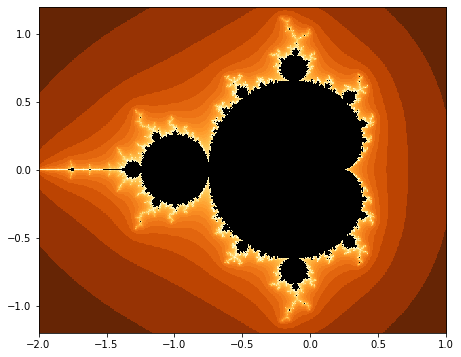

In [10]:
libpcp.complex.exercise_mandelbrot_fancy(save_file=True)

<a id='doc_functions'></a> 
## Documentation of Functions

For documenting the functions contained in `libpcp`, we follow standard Python style conventions as formulated in the [Google Python Style Guide](https://github.com/google/styleguide/blob/gh-pages/pyguide.md#38-comments-and-docstrings). Except for the solutions to the exercise, the other `libpcp`-functions are contained in some PCP notebook, where one finds a detailed explanation of the application, the underlying theory, and implementation issues. In the `Docstring` of a `libpcp`-function, we specify the PCP notebook where the function is explained and developed. Using the `help`-function, the following example shows the docstring of the function `libpcp.complex.plot_vector`. In particular, the information `Notebook: PCP_06_complex.ipynb` shows that this function is introduced in the [PCP Notebook on Complex Numbers](PCP_06_complex.html) with the filename `PCP_06_complex.ipynb`.

<div class="alert alert-block alert-warning">
<strong>Note:</strong> One needs to be careful to avoid name collisions when importing modules. For example, using <code>from libpcp import complex</code> leads to a collision of the Python method <code>complex()</code>, which returns a complex number. To avoid such collisions, one can use <code>import libpcp.complex</code> (as used above) or uses a renaming options (e.g., <code>from libpcp import complex as pcp_complex</code>).
</div>

In [11]:
help(libpcp.complex.plot_vector) 

Help on function plot_vector in module libpcp.complex:

plot_vector(c, color='k', start=0, linestyle='-')
    Plot arrow corresponding to difference of two complex numbers
    
    Notebook: PCP_06_complex.ipynb
    
    Args:
        c: Complex number
        color: Color of arrow (Default value = 'k')
        start: Complex number encoding the start position (Default value = 0)
        linestyle: Linestyle of arrow (Default value = '-')
    
    Returns:
        plt.arrow: matplotlib.patches.FancyArrow



<div>
<a href="https://opensource.org/licenses/MIT"><img src="data_layout/PCP_License.png" width=100% style="float: right;" alt="PCP License"></a>
</div>